# Shaft Speed Selection and Analysis Document

> Author: Elias Aoubala

> Date: 27/03/2025

In [4]:
import ross as rs
import numpy as np

## 1 - Background

This document contains the analysis and justification for the selection of the preliminary selection of the shaft speed of the turbopump.
A basic literature review is conducted to see what has been done, what is the current state-of-the-art, and what are the key drivers for the selection of the shaft speed of a turbopump.

## 2 - Literature Review

The shaft speed of turbopumps is an extremely influential parameter when it comes to the design to turbopump-driven cycles, as often it will drive the expected cycle performances of the system, coupled with being the key-contributor to the expected stresses the mechanical assembly will see.

Before discussing in detail the impacts of shaft speed selection have on the overall subsystem, for the sake of brevity, **discussion will be limited to assemblies which have a single shaft, just like the intended architecture of the Mermaid-man turbopump assembly, along with gas-generator based engine cycles.**

In-order to get a better idea of what has been done in terms of shaft speeds, a brief litterature review has been conducted to identify what has typically been used succesfully in the past on engines with significant heritage.

### 2.1 - Heritage Designs

A table of the engine name, propellants and turbopump shaft speeds have been presented below.

| Organsiation | Engine/Turbopump Name | Propellants | Shaft Speed (RPM) | Citation                                                                          |
| ------------ | --------------------- | ----------- | ----------------- | --------------------------------------------------------------------------------- |
| SpaceX       | Merlin 1-A            | LOX/RP-1    | 20,000            |                                                                                   |
| SpaceX       | Merlin 1-B            | LOX/RP-1    | 22,000            |                                                                                   |
| SpaceX       | Merlin 1-D            | LOX/RP-1    | 36,000            |                                                                                   |
| Perigee      | Blue 1-S              | LOX/LCH4    | 50,000            |                                                                                   |
| NASA         | Fastrac               | LOX/RP-1    | 20,000            | [NTRS](https://ntrs.nasa.gov/api/citations/19990009133/downloads/19990009133.pdf) |
| Ariane       | Vulcain 2             | LOX         | 35,680            | [Trollheden et al.](https://doi.org/10.2514/6.1999-2342)                          |
| Ariane       | Vulcain 2             | LH2         | 13,290            | [Mark and Windstrom](https://arc.aiaa.org/doi/abs/10.2514/6.1995-2404)            |
|              |                       |             |                   |                                                                                   |


## 3 - ROSS Model Instantiation

In order to evaluate the impact of the selection of shaft speed on system performance, the `ROSS` python package was used here.

This section covers the setup of a representative model of the `Mermaid Man` turbopump along with any key modelling assumptions.

### 3.1 - Baseline Rotor

The current baseline rotor consists of three bearings, a cartridge seal, a impeller and a turbine BLISK.

Influence of the cartridge seal on the static analysis and rotordynamics of the turbopump has been discounted at the current time due to limited information available.

Due to a lack of maturity in the turbin design, the turbine has been modelled as a simple cylindrical element with dimensions directly fed from the fluidic analysis previously conducted.

An image of the rotor can be found below:

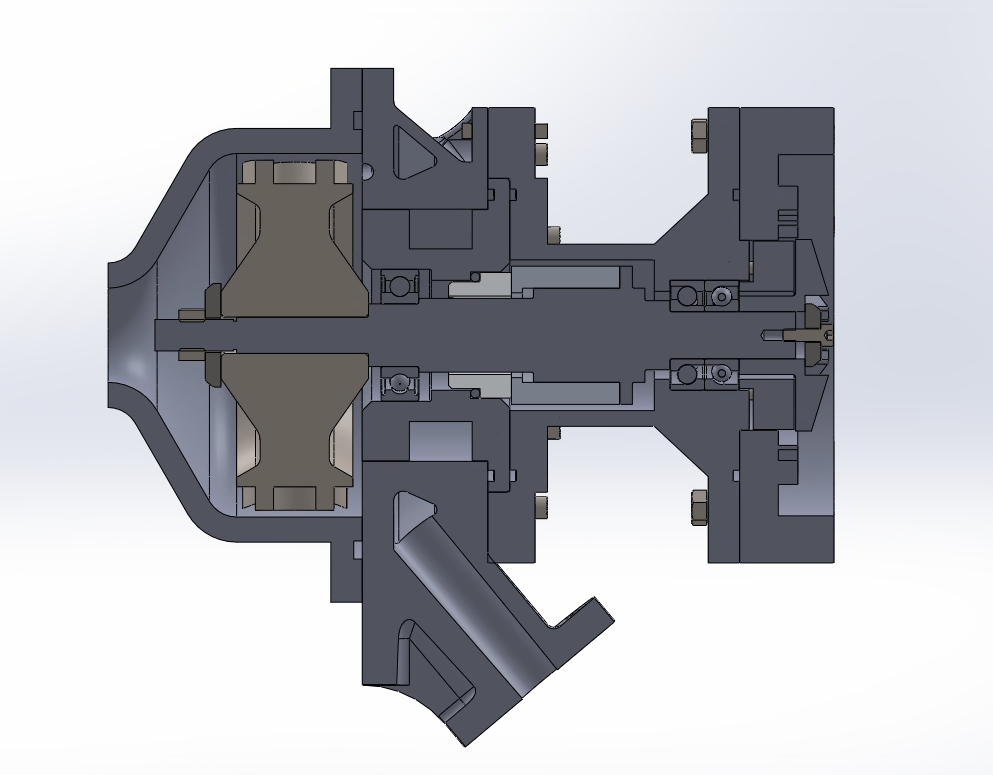

### 3.2 - Definition of Rotor Materials

For the shaft and blisk, the main material that will be used for the component manufacturing is `Stainless Steel SUS304` - primarily driven based on availability from suppliers that are within the budget of this project (JLCPCB).

Data for the Stainless Steel `SUS304` alloy has been derived from [matweb.com](https://www.matweb.com/search/datasheet.aspx?MatGUID=abc4415b0f8b490387e3c922237098da&ckck=1) and [AZO materials](https://www.azom.com/properties.aspx?ArticleID=965).

In [5]:
SUS304 = rs.Material(name="SUS304", rho = 8000, E = 193e9, G_s = 77e9)

print(SUS304)

SUS304
-----------------------------------
Density         (kg/m**3): 8000.0
Young`s modulus (N/m**2):  1.93e+11
Shear modulus   (N/m**2):  7.7e+10
Poisson coefficient     :  0.25324675


### 3.3 - Definition of Shaft Elements

Here, we define the architecture of our shaft including all the nodes and steps applied to it.

Where bearings have been placed, the stiffness has been assumed to apply "half-way" through the element, and thus the shaft node is split at this point.

In [6]:
shaft_elements = []
bearing_thickness = 11e-3 # m 

elements_array = {
    0: {
        "material": SUS304,
        "L": (21e-3),
        "odl": 10e-3,
        "idl": 0,
    },
    1: {
        "material": SUS304,
        "L": (10e-3),
        "odl": 11.5e-3,
        "idl": 0,
    },
    2: {
        "material": SUS304,
        "L": (10e-3),
        "odl": 11.5e-3,
        "idl": 0,
    },
    3: {
        "material": SUS304,
        "L": (5e-3),
        "odl": 18.5e-3,
        "idl": 0,
    },
    4: {
        "material": SUS304,
        "L": (15e-3/2),
        "odl": 19.97e-3,
        "idl": 0,
    },
    5: {
        "material": SUS304,
        "L": (15e-3/2),
        "odl": 19.97e-3,
        "idl": 0,
    },
    6: {
        "material": SUS304,
        "L": (45e-3),
        "odl": 23.50e-3,
        "idl": 0,
    },
    7: {
        "material": SUS304,
        "L": (27.5e-3),
        "odl": 29.95e-3,
        "idl": 0,
    },
    8: {
        "material": SUS304,
        "L": (4e-3),
        "odl": 44e-3,
        "idl": 0,
    },
    9: {
        "material": SUS304,
        "L": (8e-3),
        "odl": 22e-3,
        "idl": 0,
    },
    10: {
        "material": SUS304,
        "L": (23e-3 / 3),
        "odl": 14.97e-3,
        "idl": 0,
    },
    11: {
        "material": SUS304,
        "L": (23e-3 / 3),
        "odl": 14.97e-3,
        "idl": 0,
    },
    12: {
        "material": SUS304,
        "L": (23e-3 / 3),
        "odl": 14.97e-3,
        "idl": 0,
    },
    13: {
        "material": SUS304,
        "L": (42e-3 - 23e-3),
        "odl": 11.5e-3,
        "idl": 0,
    },
    14: {
        "material": SUS304,
        "L": (1e-3),
        "odl": 8e-3,
        "idl": 0,
    },
    15: {
        "material": SUS304,
        "L": (15e-3),
        "odl": 10e-3,
        "idl": 0,
    },
}
for element in elements_array:

    array = elements_array[element]

    shaft_elements.append(rs.ShaftElement(**array, n=element))

### 3.4 - Definition of Bearing Elements

For the bearing elements, the following bearing configuration has been selected:

- Rear Bearing (Blisk Side): [SKF 6003](https://www.skf.com/my/products/rolling-bearings/ball-bearings/deep-groove-ball-bearings/productid-6003%2FC3)
- Front Bearing Pair (Impeller Side): [SKF 7202](https://www.skf.com/group/products/rolling-bearings/ball-bearings/angular-contact-ball-bearings/single-row-angular-contact-ball-bearings/productid-7202%20BEP)

The `BallBearingElement` class is sued for the modelling of the bearing, and will automatically compute the stiffness for the bearing. No damping has been assumed in this model.

Key Parameters that need to be specified here are:

- `n`: Node where the bearing is placed
- `n_balls`: Number of balls within the bearing
- `d_balls`: Diameter of the balls within the bearing
- `fs`: Static Bearing Loading Force
- `alpha`: Contact Angle between bearing and inner/outer race

The static bearing loading Forces have been assumed based on a preliminary stress analysis estimating the radial forces on the bearings of approximately 800 N. Initially, an even distribution of these forces will be assumed. However a static analysis will be perfored to identify the reactions expected for the system with added weights at the impeller blisk.

For the static analysis, standard bearing class has been used.

In [ ]:
bearing_elements = []

alpha = np.pi / 6

# elements_array = {
#     "bearing_1": {
#         "n": 5,
#         "n_balls": 10,
#         "d_balls": 8e-3,
#         "fs": abs(mermaid_rotor_static_2.bearing_forces_tag["Bearing 0"]),
#         "alpha": alpha,
#     },
#     "bearing_2": {
#         "n": 11,
#         "n_balls": 10,
#         "d_balls": 8e-3,
#         "fs": abs(mermaid_rotor_static_2.bearing_forces_tag["Bearing 1"]),
#         "alpha": alpha,
#     },
#     "bearing_3": {
#         "n": 12,
#         "n_balls": 10,
#         "d_balls": 8e-3,
#         "fs": abs(mermaid_rotor_static_2.bearing_forces_tag["Bearing 2"]),
#         "alpha": alpha,
#     },
# }

elements_array = {
    "bearing_1": {
        "n": 5,
        "n_balls": 10,
        "d_balls": 8e-3,
        "fs": 79,
        "alpha": alpha,
    },
    "bearing_2": {
        "n": 11,
        "n_balls": 10,
        "d_balls": 8e-3,
        "fs": 545,
        "alpha": alpha,
    },
    "bearing_3": {
        "n": 12,
        "n_balls": 10,
        "d_balls": 8e-3,
        "fs": 1146,
        "alpha": alpha,
    },
}


for element in elements_array:

    array = elements_array[element]

    bearing_elements.append(rs.BallBearingElement(**array))

### 3.5 - Definition of Disk Elements (Impeller and Blisk)

In this section we simply specify the two disk elements relevent for this analysis, which is the turbine disk and the pump impeller.

The turbine disk dimensions have been directly derived from the fluidic analysis conducted previously.

In [27]:
rotor_elements = []

turbine = rs.DiskElement(
    n=2, 
    m=1.083,
    Id = 1039358.17e-9,
    Ip = 1039415.59e-9,
    tag="Turbine Blisk"
)


impeller = rs.DiskElement(
    n = 15, 
    m = 27.68e-3,
    Id = 4542.22e-9,
    Ip = 4580.65e-9,
)

rotor_elements.append(turbine)
rotor_elements.append(impeller)

### 3.6 - Final Rotor Assembly

In [28]:
# Moment approach
mermaid_rotor = rs.Rotor(
    shaft_elements=shaft_elements,
    bearing_elements=bearing_elements,
    disk_elements=rotor_elements,
)

print(f"Rotor Assemblt Polar Moment of Inertia: {mermaid_rotor.Ip}")

mermaid_rotor.plot_rotor()

Rotor Assemblt Polar Moment of Inertia: 0.0010894629472782316


## 4 - Shaft Static Analysis

One of the first analysis performed on the turbopump was the static analysis on the shaft to identify how the stress distribution will be like on the shaft as it currently stands.

The `run_static` subroutine from ROSS has been used for this analysis


### 4.1 - ROSS Model Augmentation

Inorder to run the static analysis, we must firstly update the `ROSS` model with regards to the bearings, as the current "ball_bearings" being utilised cannot be used for the static analysis with the script (throws an error due to the script attempting to impose a stiffness).

Inorder to resolve this issue, default bearings have been assumed at this stage.

In [29]:
bearing_elements_static = []

kxx = 10e6
kyy = 10e6
cxx = 0
cyy = 0


elements_array = {
    "bearing_1": {
        "n": 1,
        "kxx": kxx,
        "kyy": kyy,
        "cxx": cxx,
        "cyy": cyy,
        "tag": "Rear Bearing",
    },
    "bearing_2": {
        "n": 8,
        "kxx": kxx,
        "kyy": kyy,
        "cxx": cxx,
        "cyy": cyy,
        "tag": "Front Bearing 1",
    },
    "bearing_3": {
        "n": 10,
        "kxx": kxx,
        "kyy": kyy,
        "cxx": cxx,
        "cyy": cyy,
        "tag": "Front Bearing 2",
    },
}

for element in elements_array:

    array = elements_array[element]

    bearing_elements_static.append(rs.BearingElement(**array))

# Moment approach
mermaid_rotor_static = rs.Rotor(
    shaft_elements=shaft_elements,
    bearing_elements=bearing_elements_static,
    disk_elements=rotor_elements,
)

### 4.2 - Normal Static Analysis of the Rotor under its own weight

In [30]:
static = mermaid_rotor_static.run_static()

c:\Users\elias\Desktop\MermaidManBarnacleBoy\.venv\Lib\site-packages\ross\rotor_assembly.py:3300: LinAlgWarning:

Ill-conditioned matrix (rcond=1.17909e-17): result may not be accurate.



We can thus print our bearing and rotor Forces as the following:

In [31]:
print("Disk forces - nodes")
print(mermaid_rotor_static.disk_forces_nodal)
print("")
print("Disk forces - tags")
print(mermaid_rotor_static.disk_forces_tag)

print("")
print("Bearing forces - nodes")
print(mermaid_rotor_static.bearing_forces_nodal)
print("")
print("Bearing forces - tags")
print(mermaid_rotor_static.bearing_forces_tag)

Disk forces - nodes
{'node_2': 10.6204395, 'node_15': 0.27144392}

Disk forces - tags
{'Turbine Blisk': 10.6204395, 'Disk 1': 0.27144392}

Bearing forces - nodes
{'node_1': np.float64(9.481645065778535), 'node_8': np.float64(19.248204231978118), 'node_10': np.float64(-12.735900493363813)}

Bearing forces - tags
{'Bearing 0': np.float64(9.481645065778535), 'Bearing 1': np.float64(19.248204231978118), 'Bearing 2': np.float64(-12.735900493363813)}


We can also plot a free body diagram, along with other performance diagrams to see how the rotor performs.

#### 4.2.1 - Free Body Diagram

In [32]:
static.plot_free_body_diagram()

#### 4.2.2 - Expected Deformation

In [33]:
static.plot_deformation()

#### 4.2.3 - Shearing Force

In [34]:
static.plot_shearing_force()

#### 4.2.4 - Bending Moment

In [35]:
static.plot_bending_moment()

### 4.3 - Static Analysis Considering External Radial Forces

This analysis extends on the previous static analysis, and considers the added radial forces expected to be induced by the turbine and the impeller on the shaft.

The worst case assumption here is assuming that the radial loads in the direction of the blisk masses.

#### 4.3.1 - Adding Point Masses to representing the radial loads

For the sake of brevity, details on the derivation of the radial loads has been precluded from the present document.

In [36]:
F_t = 45.143
F_p = 616
g = 9.81

rotor_elements_2 = []

turbine_2 = rs.DiskElement(n=turbine.n, 
                           m=(turbine.m + F_t/g), 
                           Id=turbine.Id, 
                           Ip=turbine.Ip, 
                           tag=turbine.tag)

impeller_2 = rs.DiskElement(
    n=impeller.n, 
    m=(impeller.m + F_p / g), 
    Id=impeller.Id, 
    Ip=impeller.Ip, 
    tag=impeller.tag
)


rotor_elements_2.append(turbine_2)
rotor_elements_2.append(impeller_2)

In [37]:
# Moment approach
mermaid_rotor_static_2 = rs.Rotor(
    shaft_elements=shaft_elements,
    disk_elements=rotor_elements_2,
    bearing_elements=bearing_elements_static,
)

mermaid_rotor_static_2.plot_rotor()

In [38]:
static_2 = mermaid_rotor_static_2.run_static()

c:\Users\elias\Desktop\MermaidManBarnacleBoy\.venv\Lib\site-packages\ross\rotor_assembly.py:3300: LinAlgWarning:

Ill-conditioned matrix (rcond=1.17909e-17): result may not be accurate.



We can thus print our bearing and rotor Forces as the following:

In [39]:
print("Disk forces - nodes")
print(mermaid_rotor_static_2.disk_forces_nodal)
print("")
print("Disk forces - tags")
print(mermaid_rotor_static_2.disk_forces_tag)

print("")
print("Bearing forces - nodes")
print(mermaid_rotor_static_2.bearing_forces_nodal)
print("")
print("Bearing forces - tags")
print(mermaid_rotor_static_2.bearing_forces_tag)

Disk forces - nodes
{'node_2': 55.74733343476045, 'node_15': 616.0516681809581}

Disk forces - tags
{'Turbine Blisk': 55.74733343476045, 'Disk 1': 616.0516681809581}

Bearing forces - nodes
{'node_1': np.float64(15.807853042486022), 'node_8': np.float64(-1822.3462275005922), 'node_10': np.float64(2483.43944145821)}

Bearing forces - tags
{'Bearing 0': np.float64(15.807853042486022), 'Bearing 1': np.float64(-1822.3462275005922), 'Bearing 2': np.float64(2483.43944145821)}


We can also plot a free body diagram, along with other performance diagrams to see how the rotor performs.

#### 4.3.2 - Free Body Diagram

In [40]:
static_2.plot_free_body_diagram()

#### 4.3.3 - Expected Deformation

In [41]:
static_2.plot_deformation()

#### 4.3.4 - Shearing Force

In [42]:
static_2.plot_shearing_force()

#### 4.3.5 - Bending Moment

In [43]:
static_2.plot_bending_moment()

#### 4.3.6 - Bearing Losses

We can use the reaction forces we have identified for the bearing to define the reaction loads we expect on the shaft via the SKF website

#### 4.3.6 - Conclusion

The Key piece of information that can be identified is that the front bearings take the majority of the load and will be inputed to better refine our shaft model.

## 5 - Undamped Critical Speed Analysis

In this section, we evaluate how the critical speeds vary for the turbopump as a function of bearing stiffness.

The main objective of this study is to give us an idea of where our bearing stiffnesses should be based on our operating point - informing us of the amount of preload that will be needed on the turbopump accordingly.

This analysis will be done for a stiffness range of $10^6$ N/m to $10^{11}$ N/m.

In [23]:
stiff_range = (6, 11)

ucs_results = mermaid_rotor.run_ucs(stiffness_range=stiff_range)
ucs_fig = ucs_results.plot()

We can thus plot the results

In [24]:
N = (24000)* 2 *np.pi/60 
print(3000 * 60 / (2 * np.pi))

ucs_fig.add_hline(
    y=N,
    line_dash="dot",
    annotation_text="Operating Point",
    annotation_position="top right",
    annotation_font_size=20,
    annotation_font_color="blue",
)

ucs_fig

28647.88975654116


## 6 - Campbell Plot

A Campbell plot is created here to get an idea of the system critical speeds will be like for our current shaft stiffnesses we have modelled.


In [27]:
range = np.linspace(15e3, 35e3, 50) * 2 * np.pi / 60

campbell = mermaid_rotor.run_campbell(speed_range=range)

We can then extract our key modes and plot the Campbell diagram accordingly.


In [28]:
p = campbell.plot(harmonics=[0.5, 1, 2, 3, 4, 5, 6,])

p.add_vline(
    x=24000,
    line_dash="dot",
    annotation_text="Operating Point",
    annotation_position="top right",
    annotation_font_color="blue",
)

# p.update_yaxes(range=[0, 40e3])

### 5.1 - Fluidic Instability and Mass Imbalance

In [26]:
p = campbell.plot(harmonics=[0.5, 1])

p.add_vline(
    x=24000,
    line_dash="dot",
    annotation_text="Operating Point",
    annotation_position="top right",
    annotation_font_color="blue",
)

p.update_yaxes(range=[0, 40e3])

### 5.1 - Shaft Induced Modes

In [48]:
p = campbell.plot(harmonics=[1, 2, 3, 4, 5])

p.add_vline(
    x=24000,
    line_dash="dot",
    annotation_text="Operating Point",
    annotation_position="top right",
    annotation_font_color="blue",
)

p.update_yaxes(range=[0, 150e3])

### 5.1 - Blade Passing Frequency

We will only consider the vibration induced by the impeller which has 6 blades.

In [50]:
p = campbell.plot(harmonics=[6])

p.add_vline(
    x=25000,
    line_dash="dot",
    annotation_text="Operating Point",
    annotation_position="top right",
    annotation_font_color="blue",
)

# p.update_yaxes(range=[0, 150e3])

## 7 - Mode Shape Analysis

In this section, we aim to further investigate what the rotordynamic mode shapes look like for our different modes to see if our operating point is likely to couple with the fluidics or otherwise.

In [37]:
rotor_speed = 21496 * (2 * np.pi)/60
modal = mermaid_rotor.run_modal(rotor_speed, num_modes=16)
print(f"Undamped natural frequencies:\n {modal.wn}")

Undamped natural frequencies:
 [  910.6220056   2251.22461783  3056.51523529  5796.09528858
 17954.95035215 20020.24710869 28168.34075901 32624.41915903]


In [39]:
mode = 1
modal.plot_mode_2d(mode)

In [44]:
mode = 1
modal.plot_mode_3d(mode)